# Import Libraries

In [3]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
import math
from sklearn.metrics import mean_squared_error
import seaborn as sns
import itertools


# Import Data

In [4]:
#Import Data using yahoo finance api

import yahoo_fin.stock_info as si
from yahoo_fin.stock_info import get_analysts_info

In [5]:
amazon_analysts_info = get_analysts_info("amzn")
amazon_analysts_info

{'Earnings Estimate':   Earnings Estimate  Current Qtr. (Dec 2020)  Next Qtr. (Mar 2021)  \
 0   No. of Analysts                    40.00                 30.00   
 1     Avg. Estimate                     7.19                  9.03   
 2      Low Estimate                     4.51                  4.12   
 3     High Estimate                    11.16                 11.58   
 4      Year Ago EPS                     6.47                  5.01   
 
    Current Year (2020)  Next Year (2021)  
 0                45.00             47.00  
 1                34.94             45.58  
 2                32.20             34.03  
 3                38.89             63.03  
 4                23.01             34.94  ,
 'Revenue Estimate':           Revenue Estimate Current Qtr. (Dec 2020) Next Qtr. (Mar 2021)  \
 0          No. of Analysts                      40                   30   
 1            Avg. Estimate                 119.66B               95.46B   
 2             Low Estimate           

In [6]:
from yahoo_fin.stock_info import get_quote_table

In [7]:
get_quote_table("amzn")

{'1y Target Est': 3829.5,
 '52 Week Range': '1,626.03 - 3,552.25',
 'Ask': '3,247.00 x 800',
 'Avg. Volume': 4081037.0,
 'Beta (5Y Monthly)': 1.2,
 'Bid': '3,243.00 x 800',
 "Day's Range": '3,228.69 - 3,301.59',
 'EPS (TTM)': 34.2,
 'Earnings Date': 'Feb 02, 2021',
 'Ex-Dividend Date': nan,
 'Forward Dividend & Yield': 'N/A (N/A)',
 'Market Cap': '1.624T',
 'Open': 3235.04,
 'PE Ratio (TTM)': 94.66,
 'Previous Close': 3232.58,
 'Quote Price': 3237.6201171875,
 'Volume': 2979394.0}

In [8]:
from yahoo_fin.stock_info import get_data

In [9]:
#daily stock info for amazon 
amazon_daily = get_data("amzn", start_date="1/1/2011", end_date="1/21/2021",
                        index_as_date=True, interval="1d")
amazon_daily

,open,high,low,close,adjclose,volume,ticker
2011-01-03,181.369995,186.000000,181.210007,184.220001,184.220001,5331400,AMZN
2011-01-04,186.149994,187.699997,183.779999,185.009995,185.009995,5031800,AMZN
2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,AMZN
2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,AMZN
2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,AMZN
...,...,...,...,...,...,...,...
2021-01-13,3128.439941,3189.949951,3122.080078,3165.889893,3165.889893,3321200,AMZN
2021-01-14,3167.520020,3178.000000,3120.590088,3127.469971,3127.469971,3070900,AMZN
2021-01-15,3123.020020,3142.550049,3095.169922,3104.250000,3104.250000,4214200,AMZN
2021-01-19,3107.000000,3145.000000,3096.000000,3120.760010,3120.760010,3305100,AMZN


## Stock EDA

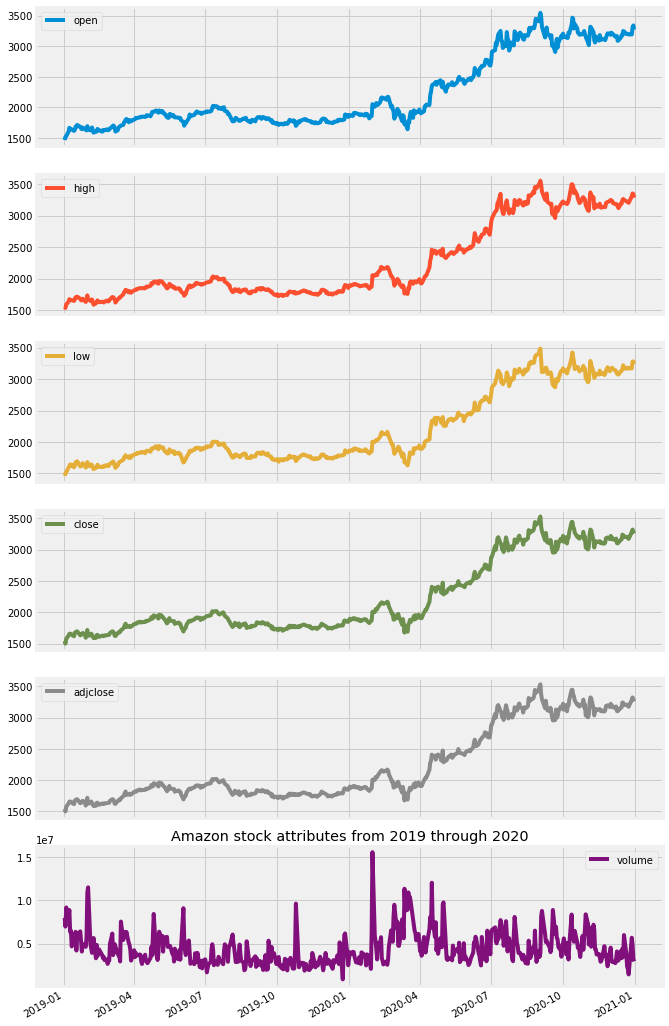

In [10]:
amazon_daily['2019':'2020'].plot(subplots=True, figsize=(10,20))
plt.title('Amazon stock attributes from 2019 through 2020')
plt.show()

In [11]:
amazon_daily.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20'],
              dtype='datetime64[ns]', length=2529, freq=None)

In [12]:
#daily stock info for amazon 
amazon_monthly = get_data("amzn", start_date="1/1/2011", end_date="1/1/2021",
                        index_as_date=True, interval="1mo")
amazon_monthly

,open,high,low,close,adjclose,volume,ticker
2011-01-01,181.369995,191.600006,166.899994,169.639999,169.639999,113611300,AMZN
2011-02-01,170.520004,191.399994,169.509995,173.289993,173.289993,95776400,AMZN
2011-03-01,173.529999,181.570007,160.589996,180.130005,180.130005,118979100,AMZN
2011-04-01,181.580002,197.800003,175.369995,195.809998,195.809998,116749400,AMZN
2011-05-01,196.570007,206.389999,190.880005,196.690002,196.690002,106274500,AMZN
...,...,...,...,...,...,...,...
2020-08-01,3180.510010,3495.000000,3073.000000,3450.959961,3450.959961,83535200,AMZN
2020-09-01,3489.580078,3552.250000,2871.000000,3148.729980,3148.729980,115943500,AMZN
2020-10-01,3208.000000,3496.239990,3019.000000,3036.149902,3036.149902,116242300,AMZN
2020-11-01,3061.739990,3366.800049,2950.120117,3168.040039,3168.040039,90810500,AMZN


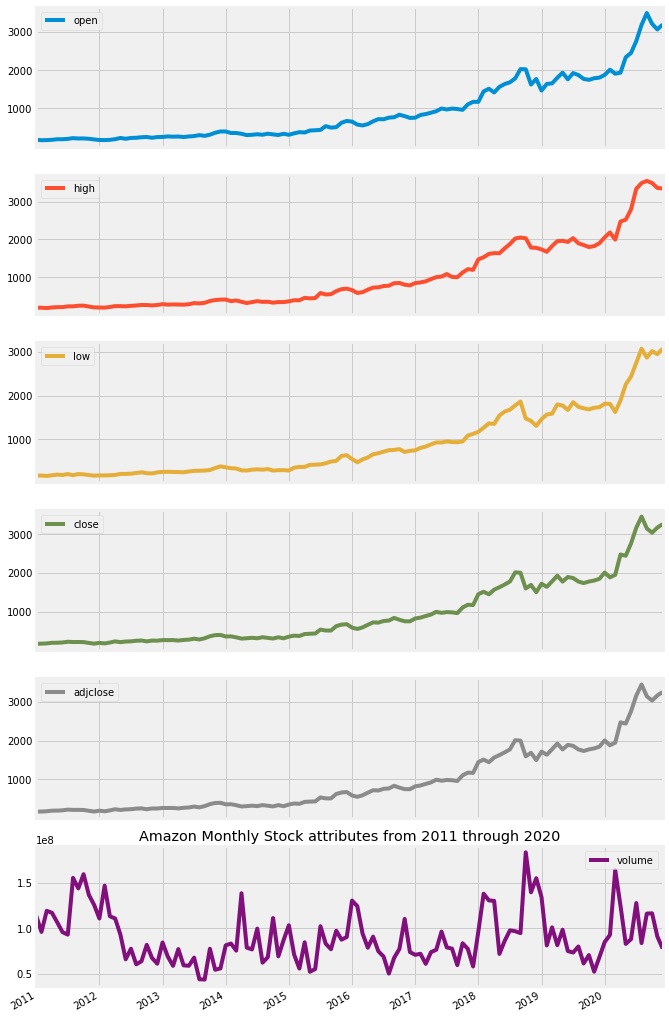

In [13]:
amazon_monthly.plot(subplots=True, figsize=(10,20))
plt.title('Amazon Monthly Stock attributes from 2011 through 2020')
plt.show()

In [14]:
#checking for date time index
amazon_daily.index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-11',
               '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-19', '2021-01-20'],
              dtype='datetime64[ns]', length=2529, freq=None)

### Using Timestamp

In [15]:
#creating a timestamp
timestamp = pd.Timestamp(2019, 4, 1, 12)
timestamp

Timestamp('2019-04-01 12:00:00')

In [16]:
#creating a period
period = pd.Period('2019-04-01')
period

Period('2019-04-01', 'D')

In [17]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [18]:
#converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2019-04-01 12:00', 'H')

In [19]:
#converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2019-04-01 00:00:00')

### Using Date_range

In [20]:
#creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/2019', end='12/31/2019')
dr1

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [21]:
#creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/2019', end='12/31/2019', freq='M')
dr2

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

In [22]:
#creating a datetimeindex without using startdate and using periods
dr3 = pd.date_range(end='12/31/2019', periods=8)
dr3

DatetimeIndex(['2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='D')

In [23]:
#creating a datetimeindex specifying start and end date, with periods
dr4 = pd.date_range(start='1/1/2019', end='12/31/2019', periods=3)
dr4

DatetimeIndex(['2019-01-01', '2019-07-02', '2019-12-31'], dtype='datetime64[ns]', freq=None)

### Resampling

In [24]:
#group the time series into monthly
amazon_month = amazon_daily['close'].resample('MS')

In [25]:
#take the eman of each grouo
amazon_month_mean = amazon_month.mean()
amazon_month_mean

2011-01-01     182.352499
2011-02-01     181.117893
2011-03-01     168.803915
2011-04-01     184.576500
2011-05-01     198.166667
                 ...     
2020-09-01    3160.748105
2020-10-01    3230.600419
2020-11-01    3141.807996
2020-12-01    3197.750000
2021-01-01    3158.764119
Freq: MS, Name: close, Length: 121, dtype: float64

In [26]:
#slice for timeseries to contain data after year 2018
amazon_month_mean['2018':]

2018-01-01    1309.010946
2018-02-01    1442.363146
2018-03-01    1540.367629
2018-04-01    1468.220471
2018-05-01    1594.903637
2018-06-01    1698.823812
2018-07-01    1784.649042
2018-08-01    1897.851308
2018-09-01    1966.077900
2018-10-01    1782.058265
2018-11-01    1625.483823
2018-12-01    1559.443154
2019-01-01    1640.032389
2019-02-01    1626.937365
2019-03-01    1722.491908
2019-04-01    1866.202375
2019-05-01    1869.383179
2019-06-01    1852.617505
2019-07-01    1965.882280
2019-08-01    1793.602722
2019-09-01    1799.120996
2019-10-01    1752.331750
2019-11-01    1774.293994
2019-12-01    1785.772845
2020-01-01    1884.237613
2020-02-01    2066.175267
2020-03-01    1872.310436
2020-04-01    2228.705241
2020-05-01    2394.184021
2020-06-01    2613.545455
2020-07-01    3053.853183
2020-08-01    3249.254755
2020-09-01    3160.748105
2020-10-01    3230.600419
2020-11-01    3141.807996
2020-12-01    3197.750000
2021-01-01    3158.764119
Freq: MS, Name: close, dtype: float64

## financial stats

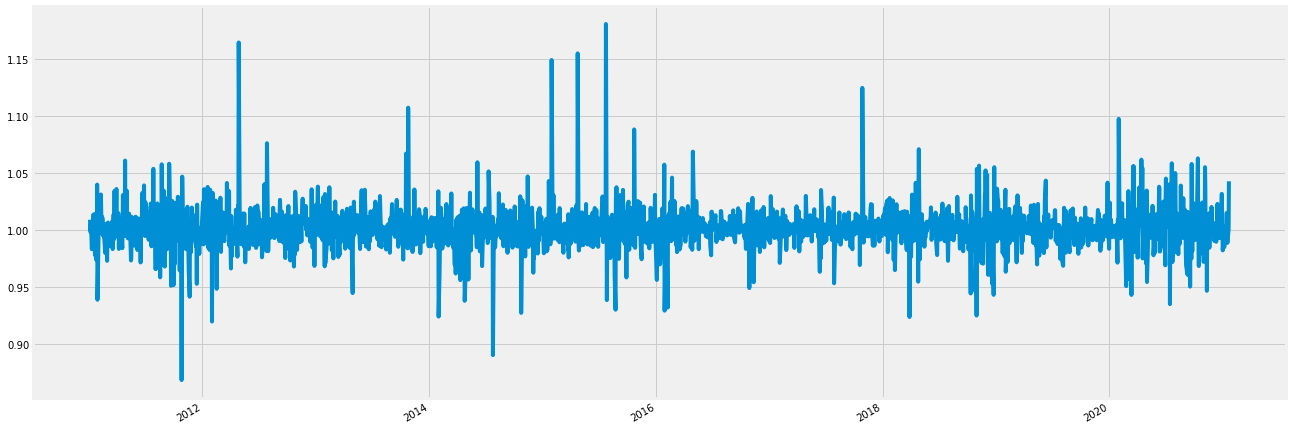

In [27]:
#Percent Change
amazon_daily['change'] = amazon_daily.high.div(amazon_daily.high.shift())
amazon_daily['change'].plot(figsize=(20,8))

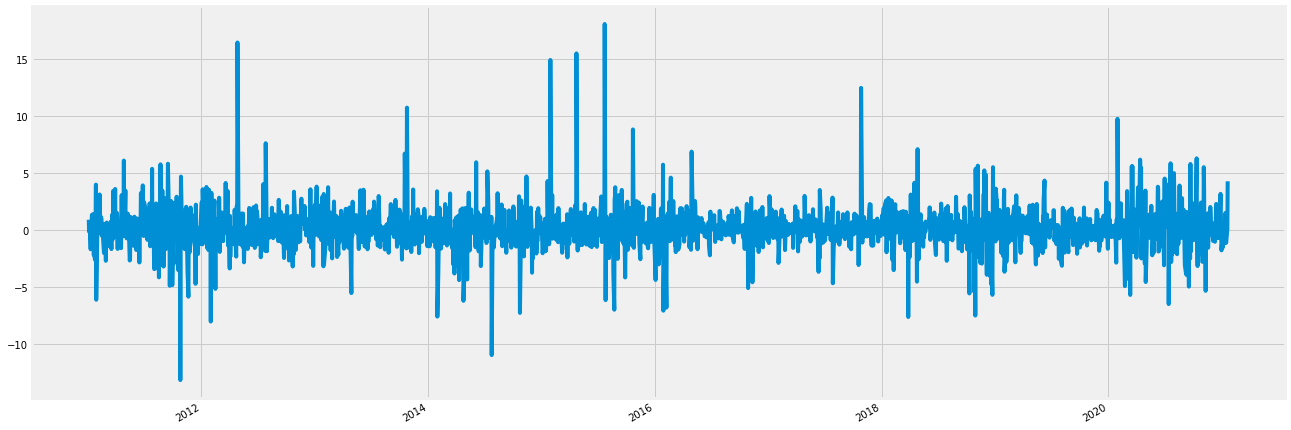

In [28]:
#Stock return
amazon_daily['return'] = amazon_daily.change.sub(1).mul(100)
amazon_daily['return'].plot(figsize=(20,8))

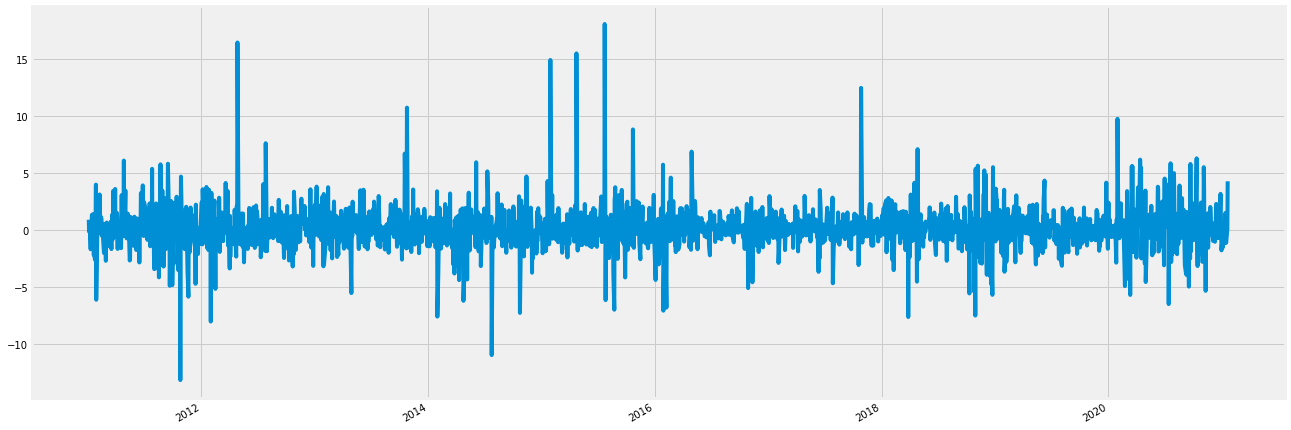

In [29]:
#Stock Return recalculated
amazon_daily.high.pct_change().mul(100).plot(figsize=(20,8))

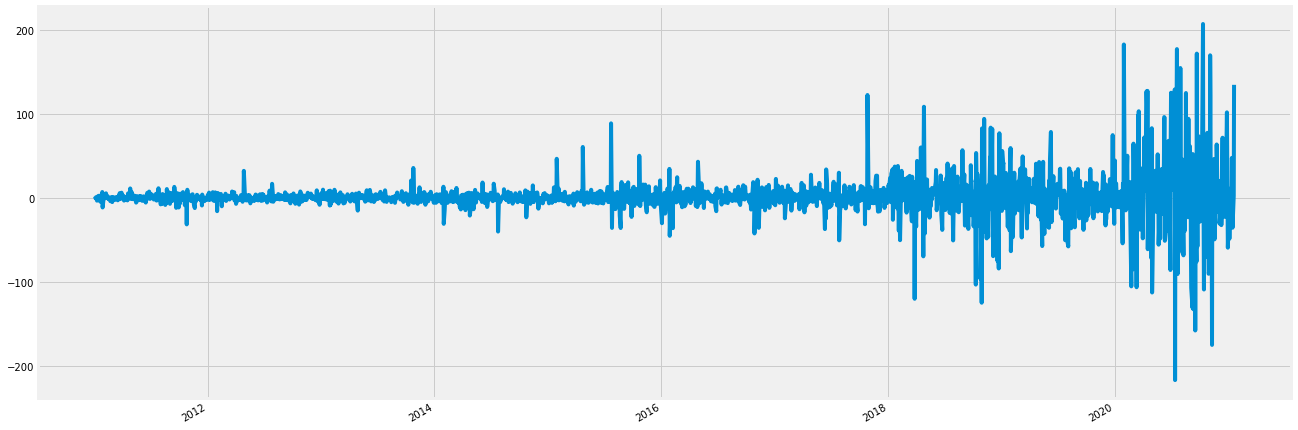

In [30]:
#absolute change
amazon_daily.high.diff().plot(figsize=(20,8))

# Trends and Decomposition

These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series
Seasonality - Clear periodic pattern of a time series(like sine funtion)
Noise - Outliers or missing values

In [31]:
#Rolling Statistics
roll_mean = amazon_daily['high'].rolling(window=12, center=False).mean()
roll_mean

2011-01-03            NaN
2011-01-04            NaN
2011-01-05            NaN
2011-01-06            NaN
2011-01-07            NaN
                 ...     
2021-01-13    3238.350789
2021-01-14    3227.850789
2021-01-15    3210.509135
2021-01-19    3194.084127
2021-01-20    3193.824137
Name: high, Length: 2529, dtype: float64

In [32]:
roll_std = amazon_daily['high'].rolling(window=12, center=False).std()
roll_std

2011-01-03          NaN
2011-01-04          NaN
2011-01-05          NaN
2011-01-06          NaN
2011-01-07          NaN
                ...    
2021-01-13    70.180948
2021-01-14    68.879618
2021-01-15    60.884554
2021-01-19    47.207581
2021-01-20    46.679490
Name: high, Length: 2529, dtype: float64

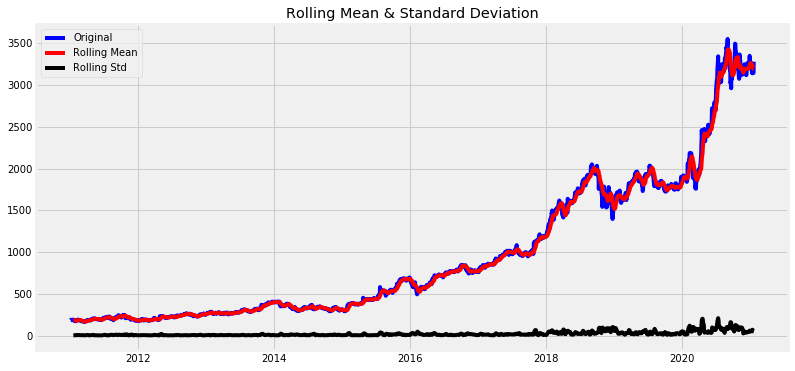

In [33]:
# Plot rolling statistics
fig = plt.figure(figsize=(12,6))
plt.plot(amazon_daily['high'], color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

## Decomposition

In [34]:
from pylab import rcParams

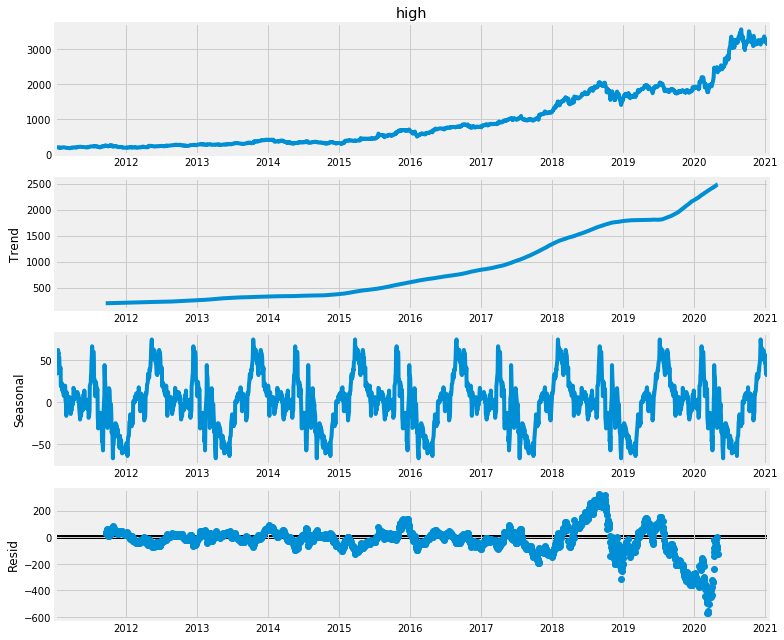

In [35]:
rcParams['figure.figsize'] = 11,9
#anaual frequency
decomposed_amazon_daily = sm.tsa.seasonal_decompose(amazon_daily['high'], freq=360)
figure = decomposed_amazon_daily.plot()
plt.show()

- Clear Upward Trend in the above plot
- Uniform Seasonal Change
- Non-uniform noise that represents outlier and missing valuse

## Dickey Fuller Test

- The Dickey-Fuller test is a common test for determining whether a time series contains trends

In [36]:

from statsmodels.tsa.stattools import adfuller

In [37]:
print('Results of dicket-fuller Test: \n')
dftest = adfuller(amazon_daily['close'])
#print legable output
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value 
print(dfoutput)

Results of dicket-fuller Test: 

Test Statistic                    2.493391
p-value                           0.999048
#Lags Used                       27.000000
Number of Observations Used    2501.000000
Critical Value (1%)              -3.432967
Critical Value (5%)              -2.862696
Critical Value (10%)             -2.567386
dtype: float64


In [38]:
#random walk?
#white noise?
#stationality?

# Correlation and Autocorrelation

In [39]:
#correlation

In [40]:
corr = amazon_daily.corr()
corr

,open,high,low,close,adjclose,volume,change,return
open,1.000000,0.999870,0.999824,0.999695,0.999695,0.073457,0.015289,0.015289
high,0.999870,1.000000,0.999778,0.999849,0.999849,0.077768,0.019419,0.019419
low,0.999824,0.999778,1.000000,0.999859,0.999859,0.067450,0.018850,0.018850
close,0.999695,0.999849,0.999859,1.000000,1.000000,0.072436,0.021591,0.021591
adjclose,0.999695,0.999849,0.999859,1.000000,1.000000,0.072436,0.021591,0.021591
volume,0.073457,0.077768,0.067450,0.072436,0.072436,1.000000,0.065970,0.065970
change,0.015289,0.019419,0.018850,0.021591,0.021591,0.065970,1.000000,1.000000
return,0.015289,0.019419,0.018850,0.021591,0.021591,0.065970,1.000000,1.000000


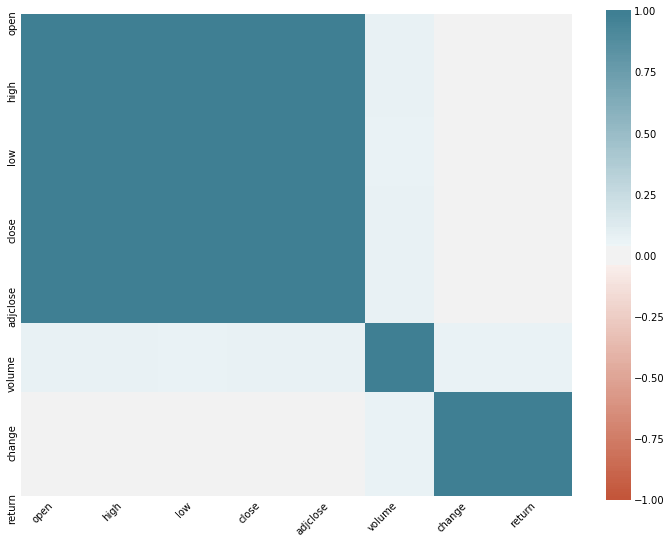

In [41]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## auto correlation


In [42]:
high = amazon_daily['high']

In [43]:
high_shift_1 = high.shift(periods=1)
high_shift_1

2011-01-03            NaN
2011-01-04     186.000000
2011-01-05     187.699997
2011-01-06     187.449997
2011-01-07     187.410004
                 ...     
2021-01-13    3142.139893
2021-01-14    3189.949951
2021-01-15    3178.000000
2021-01-19    3142.550049
2021-01-20    3145.000000
Name: high, Length: 2529, dtype: float64

In [44]:
lag_1 = pd.concat([high_shift_1, high], axis=1)
lag_1.corr()

,high,high
high,1.00000,0.99962
high,0.99962,1.00000


In [45]:
high_shift_2 = high.shift(periods=2)
lag_2 = pd.concat([high_shift_2, high], axis=1)
lag_2.corr()

,high,high
high,1.000000,0.999183
high,0.999183,1.000000


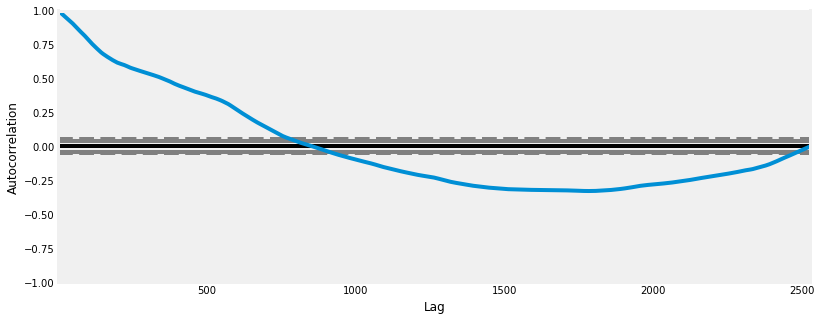

In [46]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(high);

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf

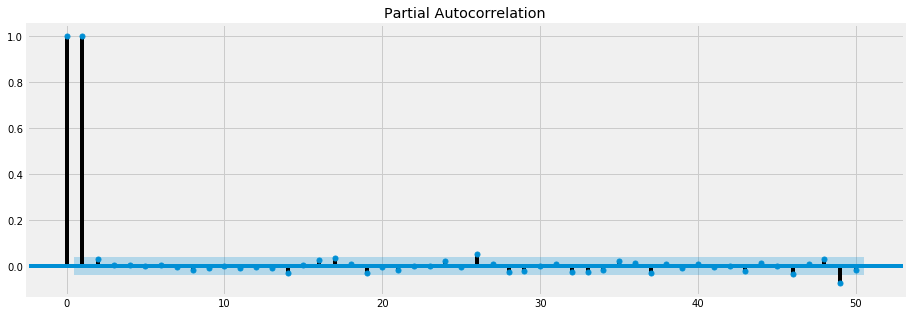

In [48]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(high, lags=50);

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

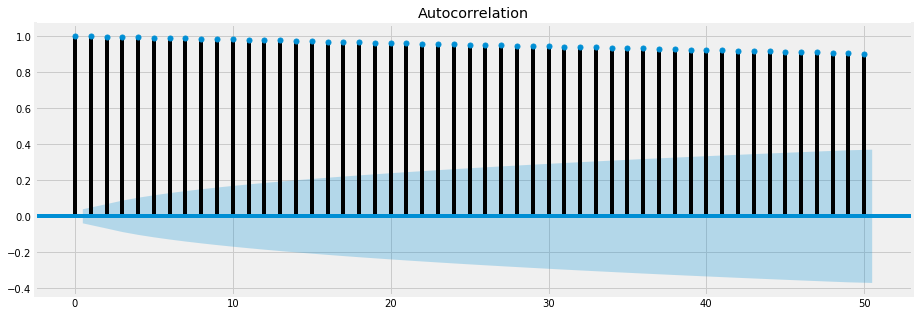

In [50]:
rcParams['figure.figsize'] = 14, 5
plot_acf(high, lags=50);

# Modeling

In [51]:
#import all necessary libraries
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

## ARMA

Autoregressive-moving-average model is used to describe weakly stationary stochastic time series in terms of two polynomials. The first of these polynomials is for autoregression, the second for the moving average.

In [52]:
#differencing closing price
amazon_close_diff = amazon_daily['close'].diff().dropna()
amazon_close_diff

2011-01-04      0.789993
2011-01-05      2.410004
2011-01-06     -1.559998
2011-01-07     -0.369995
2011-01-10     -0.810013
                 ...    
2021-01-13     45.059814
2021-01-14    -38.419922
2021-01-15    -23.219971
2021-01-19     16.510010
2021-01-20    142.619873
Name: close, Length: 2528, dtype: float64

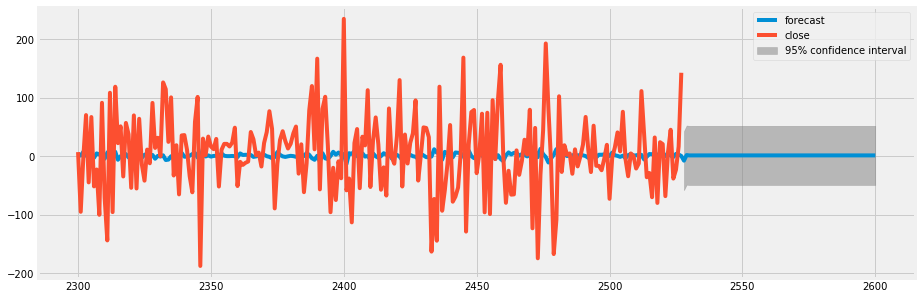

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 2528
Model:                     ARMA(1, 0)   Log Likelihood              -11802.200
Method:                       css-mle   S.D. of innovations             25.781
Date:                Thu, 28 Jan 2021   AIC                          23610.400
Time:                        16:15:29   BIC                          23627.905
Sample:                             0   HQIC                         23616.751
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2147      0.482      2.519      0.012       0.270       2.160
ar.L1.close    -0.0635      0.020     -3.179      0.001      -0.103      -0.024
                                    Roots       

In [53]:
#predicting closing price of amazon
close_predict_diff = ARMA(amazon_close_diff, order=(1,0))
model_1 = close_predict_diff.fit()
model_1.plot_predict(start=2300, end=2600)
plt.show()
print(model_1.summary())

In [54]:
print('RMSE for Model_1 :', np.sqrt(mean_squared_error(amazon_close_diff, model_1.predict())))

RMSE for Model_1 : 25.781376279820005


                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 2529
Model:                     ARMA(1, 0)   Log Likelihood              -11818.674
Method:                       css-mle   S.D. of innovations             25.861
Date:                Thu, 28 Jan 2021   AIC                          23643.347
Time:                        16:15:29   BIC                          23660.854
Sample:                             0   HQIC                         23649.700
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1436.9239   1289.204      1.115      0.265   -1089.869    3963.717
ar.L1.close     0.9998      0.000   4626.718      0.000       0.999       1.000
                                    Roots       

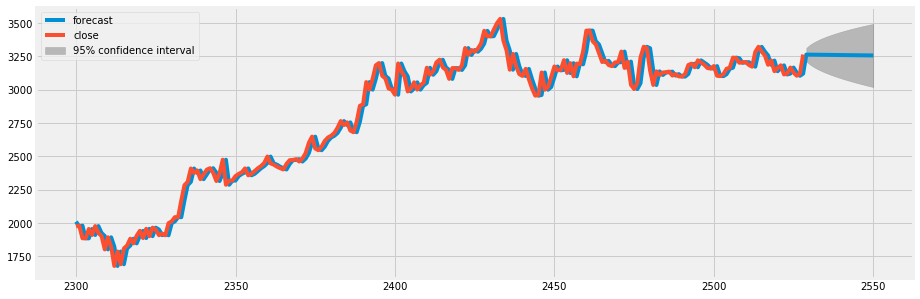

In [55]:
#predicting without differencing
close_predict = ARMA(amazon_daily['close'], order=(1,0))
model_2 = close_predict.fit()
model_2.plot_predict(start=2300, end=2550)
print(model_2.summary())

In [56]:
print('RMSE for Model_2 :', np.sqrt(mean_squared_error(amazon_daily['close'], model_2.predict())))

RMSE for Model_2 : 35.90398899224235


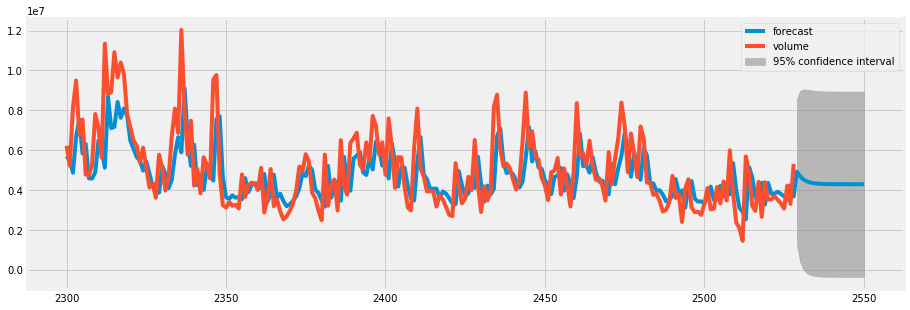

                              ARMA Model Results                              
Dep. Variable:                 volume   No. Observations:                 2529
Model:                     ARMA(1, 0)   Log Likelihood              -40092.986
Method:                       css-mle   S.D. of innovations        1856605.436
Date:                Thu, 28 Jan 2021   AIC                          80191.971
Time:                        16:15:30   BIC                          80209.478
Sample:                             0   HQIC                         80198.323
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.29e+06   9.79e+04     43.844      0.000     4.1e+06    4.48e+06
ar.L1.volume     0.6230      0.016     40.073      0.000       0.593       0.653
                                    Roots   

In [57]:
#predicting volume of amazon
volume_predict = ARMA(amazon_daily['volume'], order=(1,0))
model_3 = volume_predict.fit()
model_3.plot_predict(start=2300, end=2550)
plt.show()
print(model_3.summary())

In [58]:
print('RMSE for Model_3 :', np.sqrt(mean_squared_error(amazon_daily['volume'], model_3.predict())))

RMSE for Model_3 : 1856650.2151506501


In [59]:
#differencing volume 
amazon_volume_diff = amazon_daily['volume'].diff().dropna()
amazon_volume_diff

2011-01-04    -299600.0
2011-01-05   -1613000.0
2011-01-06    -239100.0
2011-01-07    2042000.0
2011-01-10   -1845800.0
                ...    
2021-01-13    -193400.0
2021-01-14    -250300.0
2021-01-15    1143300.0
2021-01-19    -909100.0
2021-01-20    2004700.0
Name: volume, Length: 2528, dtype: float64

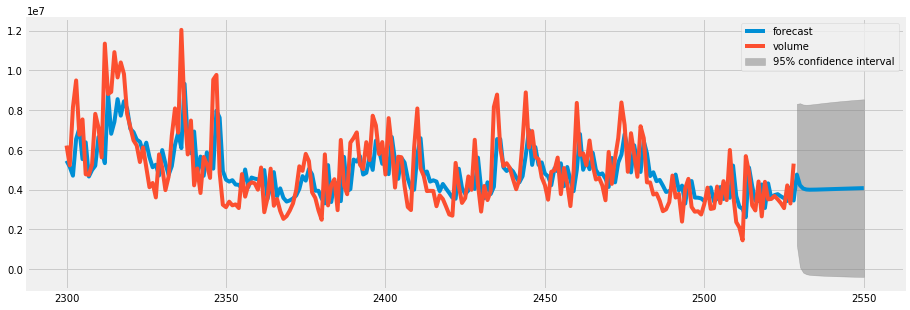

                              ARMA Model Results                              
Dep. Variable:                 volume   No. Observations:                 2529
Model:                     ARMA(2, 2)   Log Likelihood              -40036.180
Method:                       css-mle   S.D. of innovations        1815247.717
Date:                Thu, 28 Jan 2021   AIC                          80084.360
Time:                        16:15:32   BIC                          80119.374
Sample:                             0   HQIC                         80097.064
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.29e+06   2.53e+05     16.931      0.000    3.79e+06    4.79e+06
ar.L1.volume     1.2916      0.060     21.643      0.000       1.175       1.409
ar.L2.volume    -0.3055      0.056     -5.50

In [60]:
#predicting diference volume of amazon
volume_diff_predict = ARMA(amazon_daily['volume'], order=(2,2))
model_4 = volume_diff_predict.fit()
model_4.plot_predict(start=2300, end=2550)
plt.show()
print(model_4.summary())

In [61]:
print('RMSE for Model_4 :', np.sqrt(mean_squared_error(amazon_daily['volume'], model_4.predict())))

RMSE for Model_4 : 1815388.8673346746


## ARIMA

An autoregressive integrated moving average is a generalization of an autoregressive moving average (ARMA) model.  ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

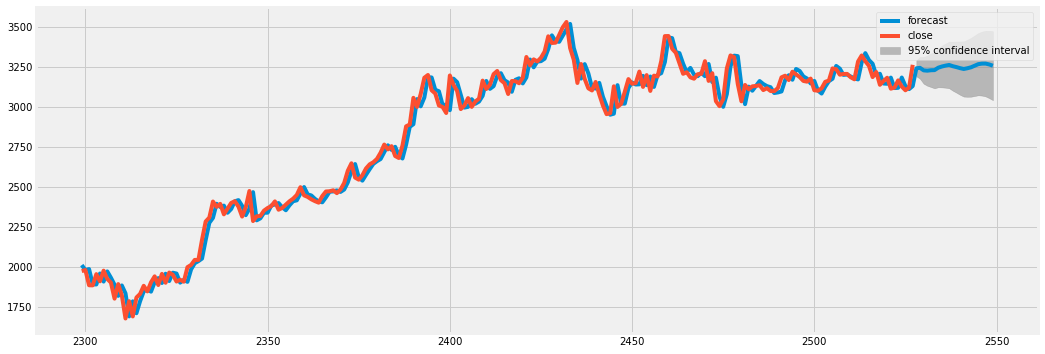

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2528
Model:                 ARIMA(5, 1, 4)   Log Likelihood              -11768.937
Method:                       css-mle   S.D. of innovations             25.441
Date:                Thu, 28 Jan 2021   AIC                          23559.875
Time:                        16:15:39   BIC                          23624.062
Sample:                             1   HQIC                         23583.164
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2073      0.464      2.603      0.009       0.298       2.116
ar.L1.D.close     0.1865      0.051      3.688      0.000       0.087       0.286
ar.L2.D.close     0.2993      0.053     

In [62]:
# Predicting amazon close
rcParams['figure.figsize'] = 16, 6
close_predict_1 = ARIMA(amazon_daily['close'], order=(5,1,4))
model_5 = close_predict_1.fit()
model_5.plot_predict(start=2300, end=2550)
plt.show()
print(model_5.summary())

In [63]:
print('RMSE for Model_5 :', np.sqrt(mean_squared_error(amazon_daily['close'].iloc[1:2529], model_5.predict())))

RMSE for Model_5 : 1257.969568855237


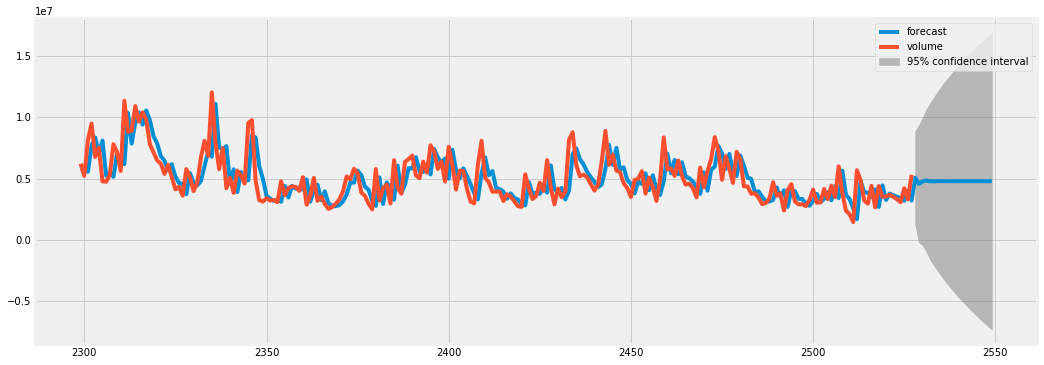

                             ARIMA Model Results                              
Dep. Variable:               D.volume   No. Observations:                 2528
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -40193.001
Method:                       css-mle   S.D. of innovations        1943795.233
Date:                Thu, 28 Jan 2021   AIC                          80394.003
Time:                        16:15:41   BIC                          80417.344
Sample:                             1   HQIC                         80402.472
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.5443   2.54e+04     -0.000      1.000   -4.98e+04    4.98e+04
ar.L1.D.volume    -0.2465      0.019    -12.896      0.000      -0.284      -0.209
ar.L2.D.volume    -0.2759      0.019

In [64]:
# Predicting amazon colume
rcParams['figure.figsize'] = 16, 6
volume_predict_1 = ARIMA(amazon_daily['volume'], order=(2,1,0))
model_6 = volume_predict_1.fit()
model_6.plot_predict(start=2300, end=2550)
plt.show()
print(model_6.summary())

In [65]:
print('RMSE for Model_6 :', np.sqrt(mean_squared_error(amazon_daily['volume'].iloc[1:2529], model_6.predict())))


RMSE for Model_6 : 5033405.369682759


## SAIRMA

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

### Tuning with Grid Search

In [66]:
#Define pdq paramaters
p = d = q = range(0,2)

In [67]:
#Generate all different cominations of pdq triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [195]:
#run a grid search with pds and seasonal pdq params to get best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(amazon_daily['close'],
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =43265.50029489011
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =39844.52428644041
ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =37076.62266775224
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =29249.101447539673
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =29117.040508150123
ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =28991.19758561118
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =30969.357711477438
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =28955.394710433502
ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =28795.45667220055
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =29155.46443594481
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =29110.221861143742
ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =28982.41527486204
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =29127.74295212234
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =29119.13414522946
ARIMA (0, 0, 0)

ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =23516.727635702144
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =23486.310394191223
ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =23367.04369033074
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =24492.493720839928
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =23429.246463941636
ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =23308.669910566587
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =26482.994513701924
ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =24433.69966617863
ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =23337.956142120132
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =23411.12340814405
ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =23379.209763646955
ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =23346.455555302393
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =23837.680544982522
ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =23339.573425845214
ARIMA (0,

ARIMA (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =23442.852364195096
ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =23445.078572298564
ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =23327.147787435326
ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =23839.048416050493
ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =23345.01202204252
ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =23275.172800200184
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =25255.38427444552
ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =23809.897122658476
ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =23593.865295502303
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =23616.63459613823
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =23518.42544556562
ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =23409.999525852818
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =25099.39824868988
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =23452.821981354413
ARIMA (1, 0

ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =23594.66581190697
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =23496.39472488161
ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =23389.792659874183
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =25130.349559576156
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =23440.465823848703
ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =23327.172901283513
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =27650.65825517953
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =24930.58119832309
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =23348.848501275614
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =23504.73380108164
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =23482.168145370295
ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =23364.63600605935
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =24439.392721921336
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =23427.94936141021
ARIMA (1, 1, 

ARIMA (1, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =23507.50667740389
ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =23482.807390502865
ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =23347.105387892327
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =24559.213376552307
ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =23532.4757954738
ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =23302.977512761405
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =26389.64972932238
ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =25589.772948010825
ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =24955.01367082649
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =23394.57960771445
ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =23360.800237647476
ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =23329.48610145969
ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =23841.75072936593
ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =23375.582811202086
ARIMA (1, 2, 2

ARIMA (2, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =23395.90152111614
ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =23363.793383187403
ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =23347.70750318898
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =23817.274355721493
ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =23323.57070069592
ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =23281.63801298594
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =25227.248920613638
ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =23778.80155321068
ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =23341.932214427987
ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =23598.7216246541
ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =23503.016349119036
ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =23393.505055299625
ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =25113.001286125975
ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =23426.88545405117
ARIMA (2, 1, 1

ARIMA (2, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =23580.908520556164
ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =23482.691197564476
ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =23375.703945137433
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =25177.115063779554
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =23426.46368739578
ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =23327.231105787676
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =27730.31317334118
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =25810.48779161257
ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =23905.287358357018
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =23491.060687801844
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =23484.37789154051
ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =23350.018902398315
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =24552.226054827923
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =23426.01284054268
ARIMA (2, 2

In [68]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

NameError: name 'ans' is not defined

In [69]:
#model with optimal paramters
sarima_model = sm.tsa.statespace.SARIMAX(amazon_daily['close'],
                                        Order=(2,1,2),
                                        seasonal_order=(2,1,2,12),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

In [70]:
#fit the model and print results
output = sarima_model.fit() 
print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0003      0.000   2258.475      0.000       0.999       1.001
ar.S.L12      -0.6491      0.045    -14.429      0.000      -0.737      -0.561
ar.S.L24      -0.1288      0.011    -12.187      0.000      -0.149      -0.108
ma.S.L12      -0.3364      0.045     -7.402      0.000      -0.426      -0.247
ma.S.L24      -0.6280      0.045    -13.831      0.000      -0.717      -0.539
sigma2       662.8234      6.636     99.884      0.000     649.817     675.830


In [71]:
print('RMSE for sarima_model :', np.sqrt(mean_squared_error(amazon_daily['close'], output.predict())))

RMSE for sarima_model : 26.06059850168805


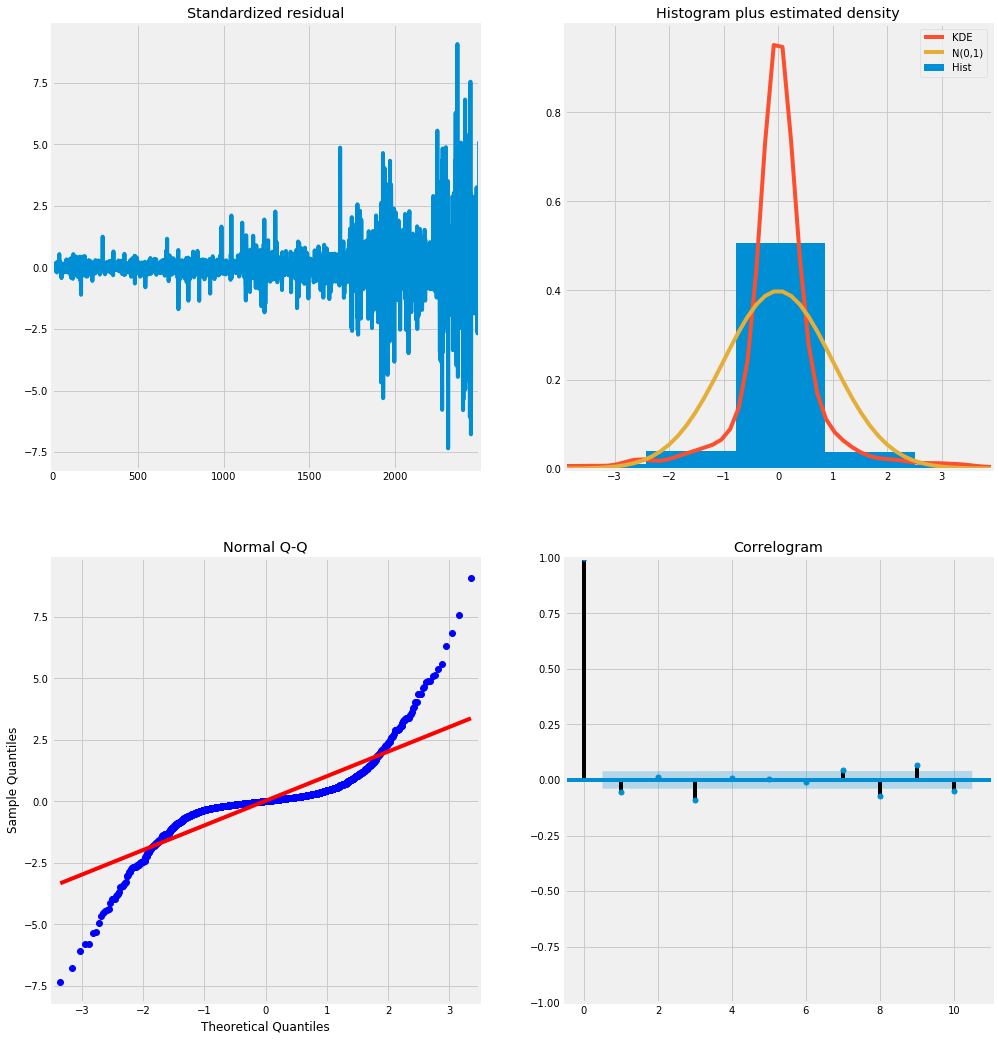

In [72]:
#plot diagnostics for results
output.plot_diagnostics(figsize=(15,18))
plt.show()

In [73]:
#get predictions and calculate confidence intervals
pred = output.get_prediction(dynamic=False)
pred_conf = pred.conf_int()

In [74]:
#forcasting and dynamic visualizations?????

## Facebook Profit

In [76]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/andrewbanner/opt/anaconda3/envs/learn-env/bin/python3.6 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/2z/jbr_5krj7fjb_xkxhnchzq2m0000gn/T/pip-install-9wsb_8f2/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/2z/jbr_5krj7fjb_xkxhnchzq2m0000gn/T/pip-install-9wsb_8f2/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/2z/jbr_5krj7fjb_xkxhnchzq2m0000gn/T/pip-wheel-yjn7dmsk
       cwd: /private/var/folders/2z/jbr_5krj7fjb_xkxhnchzq2m0000gn/T/pip-install-9wsb_8f2/fbprophet/
  Complete output (9 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
 